In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io

In [ ]:
# Link-1: https://drive.google.com/drive/folders/1elwq3gmZh8GAy0qf_03Y2p1si7KFMWDo?usp=drive_link
# Link-2: https://drive.google.com/drive/folders/1SDnlGOe_IYjKvRY3Emad1E-B8RBwGsQW?usp=drive_link
# Link-3: https://drive.google.com/drive/folders/1Trqbf3GuIEOun5veplHLFNcd7BK0NaJb?usp=drive_link

# Steps:
# 1. Download the dataset from the above mentioned links.
# 2. Create 3 folders with names as follows RUL_prediction, Dataset_BTP and FeatureTable
# 3. Upload the files downloaded from the links in the respective folders.

# Dataset Preparation

In [ ]:
# FeatureTable_2=dtframe_1
# FeatureTable_3=dtframe_2
# FeatureTable_4=dtframe_3
# FeatureTable_5=dtframe_4

In [ ]:
path = '/content/drive/MyDrive/Dataset_BTP/'
dataframes = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        name = file[:-4]
        dataframes.append(name)
        globals()[f"{name}"] = pd.read_csv(os.path.join(path, file))
        # dataframes[name] = df

print(dataframes)

['FeatureTable_5', 'FeatureTable_4', 'FeatureTable_3', 'FeatureTable_2']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
len(FeatureTable_2), len(FeatureTable_3), len(FeatureTable_4), len(FeatureTable_5)

(109, 98, 107, 105)

In [ ]:
FeatureTable_2['rul']=1-FeatureTable_2.index/len(FeatureTable_2)
FeatureTable_3['rul']=1-FeatureTable_3.index/len(FeatureTable_3)
FeatureTable_4['rul']=1-FeatureTable_4.index/len(FeatureTable_4)
FeatureTable_5['rul']=1-FeatureTable_5.index/len(FeatureTable_5)

In [ ]:
FeatureTable_2.columns

Index(['Vce_env_sigstats/ClearanceFactor', 'Vce_env_sigstats/CrestFactor',
       'Vce_env_sigstats/ImpulseFactor', 'Vce_env_sigstats/Kurtosis',
       'Vce_env_sigstats/Mean', 'Vce_env_sigstats/PeakValue',
       'Vce_env_sigstats/RMS', 'Vce_env_sigstats/SINAD',
       'Vce_env_sigstats/SNR', 'Vce_env_sigstats/ShapeFactor',
       'Vce_env_sigstats/Skewness', 'Vce_env_sigstats/Std',
       'Vce_env_sigstats/THD', 'Vce_sigstats/ClearanceFactor',
       'Vce_sigstats/CrestFactor', 'Vce_sigstats/ImpulseFactor',
       'Vce_sigstats/Kurtosis', 'Vce_sigstats/Mean', 'Vce_sigstats/PeakValue',
       'Vce_sigstats/RMS', 'Vce_sigstats/SINAD', 'Vce_sigstats/SNR',
       'Vce_sigstats/ShapeFactor', 'Vce_sigstats/Skewness', 'Vce_sigstats/Std',
       'Vce_sigstats/THD', 'rul'],
      dtype='object')

In [ ]:
def create_merge_df(df_lst):
  dfs = []
  for df in df_lst:
      n=df.shape[0]
      temp_df = pd.DataFrame({
          'rul': df.index,
          'Vce_env_sigstats/ClearanceFactor':df['Vce_env_sigstats/ClearanceFactor'],
          'Vce_env_sigstats/CrestFactor':df['Vce_env_sigstats/CrestFactor'],
          'Vce_env_sigstats/ImpulseFactor':df['Vce_env_sigstats/ImpulseFactor'],
          'Vce_env_sigstats/Kurtosis':df['Vce_env_sigstats/Kurtosis'],
          'Vce_env_sigstats/Mean':df['Vce_env_sigstats/Mean'],
          'Vce_env_sigstats/PeakValue':df['Vce_env_sigstats/PeakValue'],
          'Vce_env_sigstats/RMS':df['Vce_env_sigstats/RMS'],
          'Vce_env_sigstats/SINAD':df['Vce_env_sigstats/SINAD'],
          'Vce_env_sigstats/SNR':df['Vce_env_sigstats/SNR'],
          'Vce_env_sigstats/ShapeFactor':df['Vce_env_sigstats/ShapeFactor'],
          'Vce_env_sigstats/Skewness':df['Vce_env_sigstats/Skewness'],
          'Vce_env_sigstats/Std':df['Vce_env_sigstats/Std'],
          'Vce_env_sigstats/THD':df['Vce_env_sigstats/THD'],
          'Vce_sigstats/ClearanceFactor':df['Vce_sigstats/ClearanceFactor'],
          'Vce_sigstats/CrestFactor':df['Vce_sigstats/CrestFactor'],
          'Vce_sigstats/ImpulseFactor':df['Vce_sigstats/ImpulseFactor'],
          'Vce_sigstats/Kurtosis':df['Vce_sigstats/Kurtosis'],
          'Vce_sigstats/Mean':df['Vce_sigstats/Mean'],
          'Vce_sigstats/PeakValue':df['Vce_sigstats/PeakValue'],
          'Vce_sigstats/RMS':df['Vce_sigstats/RMS'],
          'Vce_sigstats/SINAD':df['Vce_sigstats/SINAD'],
          'Vce_sigstats/SNR':df['Vce_sigstats/SNR'],
          'Vce_sigstats/ShapeFactor':df['Vce_sigstats/ShapeFactor'],
          'Vce_sigstats/Skewness':df['Vce_sigstats/Skewness'],
          'Vce_sigstats/Std':df['Vce_sigstats/Std'],
          'Vce_sigstats/THD':df['Vce_sigstats/THD']
      })
      temp_df['rul']=1-temp_df['rul']/n
      dfs.append(temp_df)

  return pd.concat(dfs, ignore_index=True)

In [ ]:
df_Device234=create_merge_df([FeatureTable_2, FeatureTable_3, FeatureTable_4])
df_Device345=create_merge_df([FeatureTable_3, FeatureTable_4, FeatureTable_5])
df_Device235=create_merge_df([FeatureTable_2, FeatureTable_3, FeatureTable_5])
df_Device245=create_merge_df([FeatureTable_2, FeatureTable_4, FeatureTable_5])

In [ ]:
df_Device234

,rul,Vce_env_sigstats/ClearanceFactor,Vce_env_sigstats/CrestFactor,Vce_env_sigstats/ImpulseFactor,Vce_env_sigstats/Kurtosis,Vce_env_sigstats/Mean,Vce_env_sigstats/PeakValue,Vce_env_sigstats/RMS,Vce_env_sigstats/SINAD,Vce_env_sigstats/SNR,...,Vce_sigstats/Kurtosis,Vce_sigstats/Mean,Vce_sigstats/PeakValue,Vce_sigstats/RMS,Vce_sigstats/SINAD,Vce_sigstats/SNR,Vce_sigstats/ShapeFactor,Vce_sigstats/Skewness,Vce_sigstats/Std,Vce_sigstats/THD
0,1.000000,115.820815,70.568083,93.443674,2414.119787,0.011387,1.064085,0.015079,-10.041579,-10.041235,...,1.141924,1.987973,2.59400,2.069660,15.557419,16.706400,1.041091,-0.360668,0.575724,-6.599268
1,0.990826,119.141859,69.805721,94.366466,2101.478786,0.011095,1.046967,0.014998,-11.423409,-11.419409,...,1.142188,2.023744,2.62525,2.092426,15.750486,16.900122,1.033938,-0.359638,0.531703,-6.227985
2,0.981651,105.890786,66.982969,87.037722,2184.367962,0.012306,1.071053,0.015990,-10.533918,-10.533918,...,1.142812,2.040928,2.62525,2.104424,15.790969,16.979246,1.031111,-0.359159,0.513044,-6.214884
3,0.972477,106.372825,66.826572,87.068387,2133.578176,0.012163,1.059029,0.015847,-11.219128,-11.219027,...,1.142427,2.040208,2.59400,2.103716,15.829616,17.012555,1.031128,-0.358330,0.513008,-6.249418
4,0.963303,106.232166,66.749060,87.126443,2086.706447,0.012266,1.068683,0.016010,-10.926124,-10.925219,...,1.142528,2.037708,2.62525,2.101430,15.842978,17.007546,1.031271,-0.358567,0.513570,-6.263150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.046729,235.380475,130.679670,202.695877,15852.466427,0.014711,2.981924,0.022819,-10.322064,-10.301734,...,1.179951,5.039598,6.30500,5.062564,10.676652,11.727559,1.004557,-0.404093,0.481673,-6.874701
310,0.037383,296.229444,94.440689,159.025998,3502.808871,0.008490,1.350068,0.014295,-0.054044,0.008529,...,1.223478,2.376208,2.83625,2.380101,10.098868,10.944776,1.001638,-0.352377,0.136076,-6.299252
311,0.028037,290.164283,92.802849,155.650176,3278.161677,0.008509,1.324400,0.014271,0.490033,0.530930,...,1.223017,2.376292,2.83625,2.380186,10.180399,11.107820,1.001639,-0.353136,0.136101,-6.252598
312,0.018692,294.532395,94.110797,157.745967,3513.742562,0.008554,1.349395,0.014338,0.315118,0.331585,...,1.224423,2.375648,2.86750,2.379512,9.460789,10.264142,1.001626,-0.353321,0.135549,-6.673076


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# **Execution**

In [ ]:
X=FeatureTable_2.iloc[:, :-1]
y=FeatureTable_2['rul']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((87, 26), (22, 26), (87,), (22,))

In [ ]:
error_df=[]

# **Models**

In [ ]:
model1=linear_model.LinearRegression()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
mean_squared_error(y_test, y_pred1), r2_score(y_test, y_pred1)
error_df.append(['Linear Regression', mean_squared_error(y_test, y_pred1), r2_score(y_test, y_pred1)])

In [ ]:
model2=linear_model.Ridge(alpha=0.1)
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)
mean_squared_error(y_test, y_pred2), r2_score(y_test, y_pred2)
error_df.append(['Ridge Regression', mean_squared_error(y_test, y_pred2), r2_score(y_test, y_pred2)])

In [ ]:
model3=linear_model.Lasso(alpha=0.1)
model3.fit(X_train, y_train)
y_pred3=model3.predict(X_test)
mean_squared_error(y_test, y_pred3), r2_score(y_test, y_pred3)
error_df.append(['Lasso Regression', mean_squared_error(y_test, y_pred3), r2_score(y_test, y_pred3)])

In [ ]:
model4=linear_model.ElasticNet(alpha=0.1)
model4.fit(X_train, y_train)
y_pred4=model4.predict(X_test)
mean_squared_error(y_test, y_pred4), r2_score(y_test, y_pred4)
error_df.append(['ElasticNet Regression', mean_squared_error(y_test, y_pred4), r2_score(y_test, y_pred4)])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.984e-01, tolerance: 7.200e-04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
model5=linear_model.SGDRegressor(alpha=0.1)
model5.fit(X_train, y_train)
y_pred5=model5.predict(X_test)
mean_squared_error(y_test, y_pred5), r2_score(y_test, y_pred5)
error_df.append(['SGD Regression', mean_squared_error(y_test, y_pred5), r2_score(y_test, y_pred5)])

In [ ]:
model6=linear_model.BayesianRidge(alpha_1=0.9, alpha_2=0.1, lambda_1=0.9, lambda_2=0)
model6.fit(X_train, y_train)
y_pred6=model6.predict(X_test)
mean_squared_error(y_test, y_pred6), r2_score(y_test, y_pred6)
error_df.append(['BayesianRidge Regression', mean_squared_error(y_test, y_pred6), r2_score(y_test, y_pred6)])

In [ ]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(100, 20), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001,
                 max_iter=1000,tol=1e-4)
nn.fit(X_train, y_train)
y_pred7=nn.predict(X_test)
mean_squared_error(y_test, y_pred7), r2_score(y_test, y_pred7)
error_df.append(['MLP Regression', mean_squared_error(y_test, y_pred7), r2_score(y_test, y_pred7)])

In [ ]:
from sklearn.svm import LinearSVR, SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model8 = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model8.fit(X_train, y_train)
y_pred8=model8.predict(X_test)
mean_squared_error(y_test, y_pred8), r2_score(y_test, y_pred8)
error_df.append(['SVR Regression', mean_squared_error(y_test, y_pred8), r2_score(y_test, y_pred8)])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

In [ ]:
model9=GradientBoostingRegressor(learning_rate=0.01, n_estimators=500)
model9.fit(X_train, y_train)
y_pred9=model9.predict(X_test)
mean_squared_error(y_test, y_pred9), r2_score(y_test, y_pred9)
error_df.append(['Gradient Boosting Regression', mean_squared_error(y_test, y_pred9), r2_score(y_test, y_pred9)])

In [ ]:
model10=RandomForestRegressor(n_estimators=500, max_features='sqrt', max_depth=100)
model10.fit(X_train, y_train)
y_pred10=model10.predict(X_test)
mean_squared_error(y_test, y_pred10), r2_score(y_test, y_pred10)
error_df.append(['Random Forest Regression', mean_squared_error(y_test, y_pred10), r2_score(y_test, y_pred10)])

In [ ]:
model11=AdaBoostRegressor(learning_rate=0.1, n_estimators=100, loss='linear')
model11.fit(X_train, y_train)
y_pred11=model11.predict(X_test)
mean_squared_error(y_test, y_pred11), r2_score(y_test, y_pred11)
error_df.append(['AdaBoost Regression', mean_squared_error(y_test, y_pred11), r2_score(y_test, y_pred11)])

In [ ]:
model12=VotingRegressor(estimators=[('gb', model9), ('rf', model10), ('ada', model11)])
model12.fit(X_train, y_train)
y_pred12=model12.predict(X_test)
mean_squared_error(y_test, y_pred12), r2_score(y_test, y_pred12)
error_df.append(['Voting Regression', mean_squared_error(y_test, y_pred12), r2_score(y_test, y_pred12)])

# **Results**

In [ ]:
error_df

[['Linear Regression', 0.0502554167392656, 0.40970259426401023],
 ['Ridge Regression', 0.01688675678003157, 0.8016490685916668],
 ['Lasso Regression', 0.01680524068310291, 0.8026065522554151],
 ['ElasticNet Regression', 0.016596217523427458, 0.8050617269788745],
 ['SGD Regression', 2.656037506734965e+33, -3.119767283788418e+34],
 ['BayesianRidge Regression', 0.013385013015705572, 0.8427803613706752],
 ['MLP Regression', 186488.23476651593, -2190479.714827065],
 ['SVR Regression', 0.018525845162692532, 0.782396425138791],
 ['Gradient Boosting Regression', 0.004313094929206689, 0.9493386203399143],
 ['Random Forest Regression', 0.0038998238218725186, 0.9541928804048676],
 ['AdaBoost Regression', 0.004708508776249459, 0.9446941106881007],
 ['Voting Regression', 0.004109161583069187, 0.9517340103889629]]

In [ ]:
# [['Linear Regression', 0.02574600467365376, 0.6746867219444597],
#  ['Ridge Regression', 0.017320015998045953, 0.7811531827280167],
#  ['Lasso Regression', 0.01386602517534192, 0.8247960349355838],
#  ['ElasticNet Regression', 0.013398391402278428, 0.8307048148636959],
#  ['SGD Regression', 1.345391532563734e+32, -1.699967568849054e+33],
#  ['BayesianRidge Regression', 0.01284675472891552, 0.8376750122509037],
#  ['MLP Regression', 570.2893099072705, -7204.882512552095],
#  ['SVR Regression', 0.018964846565130103, 0.7603699493523288],

#  ['Gradient Boosting Regression', 0.0047766731579343925, 0.9396444138457843],
#  ['Random Forest Regression', 0.0033836305558905904, 0.957246183948997],
#  ['AdaBoost Regression', 0.0046335161947478375, 0.9414532716301672],
#  ['Voting Regression', 0.003966248235554159, 0.9498845264946882]]

# Misc.

## Importing datasets

In [ ]:
import os
import pickle
path = '/content/drive/MyDrive/RUL_prediction/datasets/'
dataframes = []

for file in os.listdir(path):
    if file.endswith('.pkl'):
        name = file[:-4]
        dataframes.append(name)
        globals()[f"{name}"] = pd.read_pickle(os.path.join(path, file))
        # dataframes[name] = df

print(dataframes)

['df_Device3', 'df_Device4', 'df_Device2', 'df_Device5']


## Plots

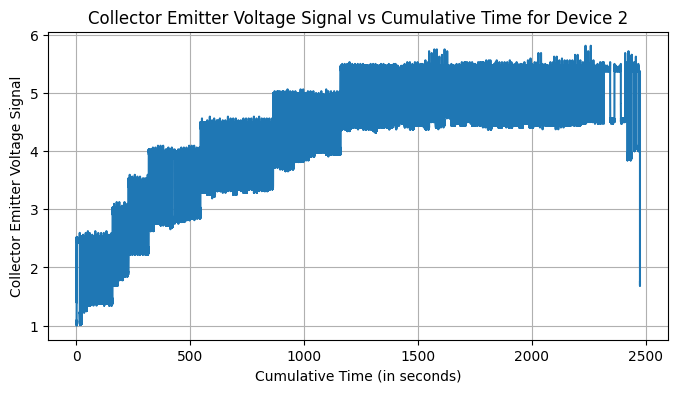

In [ ]:
# Calculate cumulative time with interpolation
df_Device2['time_difference'] = df_Device2['timeEpoch'].diff()
df_Device2['time_difference'] = df_Device2['time_difference'].fillna(0)
df_Device2['cumulative_time'] = df_Device2['time_difference'].cumsum()

# Interpolate cumulative time
interpolated_time = []
for i in range(df_Device2.shape[0]):
    start_time = df_Device2['cumulative_time'][i]
    if i < df_Device2.shape[0] - 1:
        end_time = df_Device2['cumulative_time'][i + 1]
    else:
        end_time = start_time  # For the last row, keep the same time
    time_values = np.linspace(start_time, end_time, num=len(df_Device2['collectorEmitterVoltage'][i]))
    interpolated_time.extend(time_values)

# Flatten the collectorEmitterCurrentSignal
flattened_voltage = np.concatenate(df_Device2['collectorEmitterVoltage'].values)

# Plot the curve
plt.figure(figsize=(8, 4))
plt.plot(interpolated_time, flattened_voltage)
plt.xlabel('Cumulative Time (in seconds)')
plt.ylabel('Collector Emitter Voltage Signal')
plt.title('Collector Emitter Voltage Signal vs Cumulative Time for Device 2')
plt.grid(True)
plt.show()

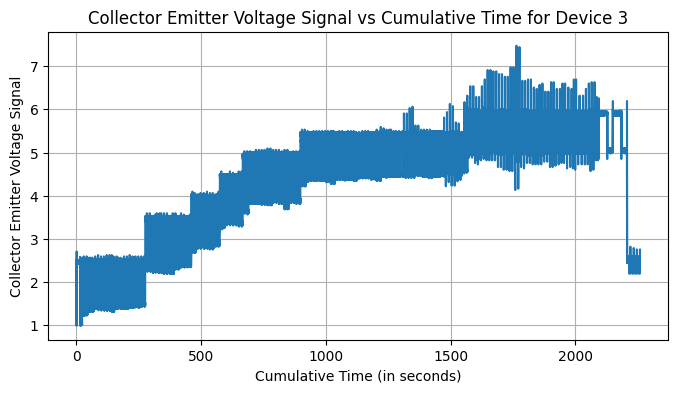

In [ ]:
# Calculate cumulative time with interpolation
df_Device3['time_difference'] = df_Device3['timeEpoch'].diff()
df_Device3['time_difference'] = df_Device3['time_difference'].fillna(0)
df_Device3['cumulative_time'] = df_Device3['time_difference'].cumsum()

# Interpolate cumulative time
interpolated_time = []
for i in range(df_Device3.shape[0]):
    start_time = df_Device3['cumulative_time'][i]
    if i < df_Device3.shape[0] - 1:
        end_time = df_Device3['cumulative_time'][i + 1]
    else:
        end_time = start_time  # For the last row, keep the same time
    time_values = np.linspace(start_time, end_time, num=len(df_Device3['collectorEmitterVoltage'][i]))
    interpolated_time.extend(time_values)

# Flatten the collectorEmitterCurrentSignal
flattened_voltage = np.concatenate(df_Device3['collectorEmitterVoltage'].values)

# Plot the curve
plt.figure(figsize=(8, 4))
plt.plot(interpolated_time, flattened_voltage)
plt.xlabel('Cumulative Time (in seconds)')
plt.ylabel('Collector Emitter Voltage Signal')
plt.title('Collector Emitter Voltage Signal vs Cumulative Time for Device 3')
plt.grid(True)
plt.show()


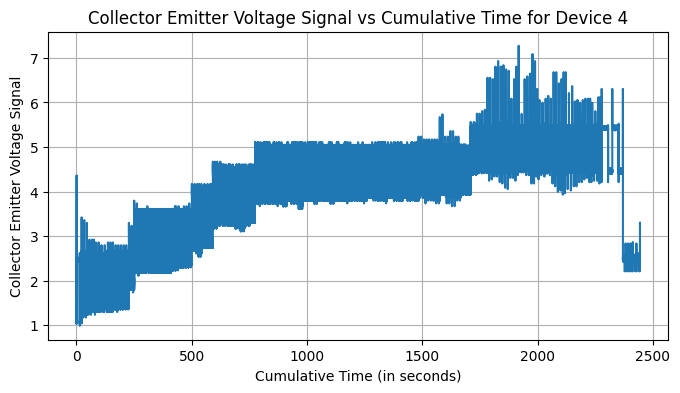

In [ ]:
# Calculate cumulative time with interpolation
df_Device4['time_difference'] = df_Device4['timeEpoch'].diff()
df_Device4['time_difference'] = df_Device4['time_difference'].fillna(0)
df_Device4['cumulative_time'] = df_Device4['time_difference'].cumsum()

# Interpolate cumulative time
interpolated_time = []
for i in range(df_Device4.shape[0]):
    start_time = df_Device4['cumulative_time'][i]
    if i < df_Device4.shape[0] - 1:
        end_time = df_Device4['cumulative_time'][i + 1]
    else:
        end_time = start_time  # For the last row, keep the same time
    time_values = np.linspace(start_time, end_time, num=len(df_Device4['collectorEmitterVoltage'][i]))
    interpolated_time.extend(time_values)

# Flatten the collectorEmitterCurrentSignal
flattened_voltage = np.concatenate(df_Device4['collectorEmitterVoltage'].values)

# Plot the curve
plt.figure(figsize=(8, 4))
plt.plot(interpolated_time, flattened_voltage)
plt.xlabel('Cumulative Time (in seconds)')
plt.ylabel('Collector Emitter Voltage Signal')
plt.title('Collector Emitter Voltage Signal vs Cumulative Time for Device 4')
plt.grid(True)
plt.show()


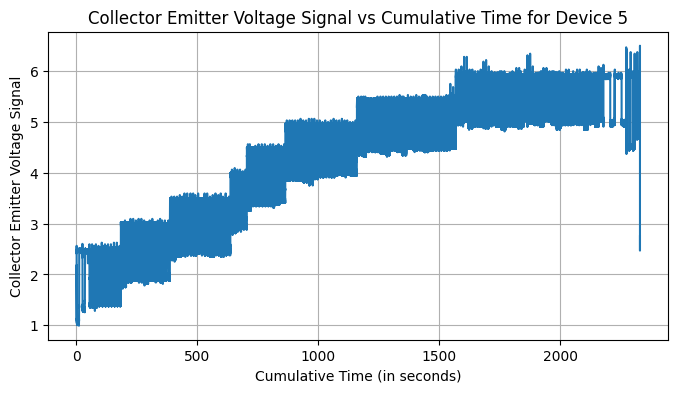

In [ ]:
# Calculate cumulative time with interpolation
df_Device5['time_difference'] = df_Device5['timeEpoch'].diff()
df_Device5['time_difference'] = df_Device5['time_difference'].fillna(0)
df_Device5['cumulative_time'] = df_Device5['time_difference'].cumsum()

# Interpolate cumulative time
interpolated_time = []
for i in range(df_Device5.shape[0]):
    start_time = df_Device5['cumulative_time'][i]
    if i < df_Device5.shape[0] - 1:
        end_time = df_Device5['cumulative_time'][i + 1]
    else:
        end_time = start_time  # For the last row, keep the same time
    time_values = np.linspace(start_time, end_time, num=len(df_Device5['collectorEmitterVoltage'][i]))
    interpolated_time.extend(time_values)

# Flatten the collectorEmitterCurrentSignal
flattened_voltage = np.concatenate(df_Device5['collectorEmitterVoltage'].values)

# Plot the curve
plt.figure(figsize=(8, 4))
plt.plot(interpolated_time, flattened_voltage)
plt.xlabel('Cumulative Time (in seconds)')
plt.ylabel('Collector Emitter Voltage Signal')
plt.title('Collector Emitter Voltage Signal vs Cumulative Time for Device 5')
plt.grid(True)
plt.show()


In [ ]:
df_Device2

,date,timeEpoch,dt,gateSignalVoltage,gateEmitterVoltage,collectorEmitterVoltage,collectorEmitterCurrentSignal,time_difference,cumulative_time
0,12/24/2008 9:59:47 AM.786743640,3.312986e+09,8.000000e-09,"[11.9374991872, 11.9374991872, 11.9374991872, ...","[11.9374991872, 11.9374991872, 11.9374991872, ...","[1.0498045984000002, 1.0571288176, 1.049804598...","[6.6773067904, 6.693666557376, 6.701846440864,...",0.0,0.0
1,12/24/2008 10:00:10 AM.760743618,3.312986e+09,1.600000e-08,"[-1.9374914560000036, -1.9374914560000036, -0....","[4.139999360000001, 4.452499328, 4.13999936000...","[2.2502500608, 2.219000064, 2.2815000575999997...","[1.9032111413247985, 1.9032111413247985, 1.903...",23.0,23.0
2,12/24/2008 10:00:33 AM.631743907,3.312986e+09,1.600000e-08,"[-0.37499135999999567, -0.37499135999999567, -...","[4.139999360000001, 4.139999360000001, 4.45249...","[2.1877500671999996, 2.219000064, 2.219000064,...","[1.9032111413247985, 1.9032111413247985, 1.903...",23.0,46.0
3,12/24/2008 10:00:49 AM.531743526,3.312986e+09,1.600000e-08,"[-1.9374914560000036, -1.9374914560000036, -3....","[4.139999360000001, 4.139999360000001, 4.13999...","[2.2502500608, 2.219000064, 2.219000064, 2.250...","[1.9032111413247985, 1.9032111413247985, 1.692...",16.0,62.0
4,12/24/2008 10:01:16 AM.608743667,3.312986e+09,1.600000e-08,"[-3.4999915520000116, -3.4999915520000116, -1....","[4.139999360000001, 4.452499328, 4.452499328, ...","[2.219000064, 2.219000064, 2.219000064, 2.2502...","[1.9032111413247985, 1.9032111413247985, 1.903...",27.0,89.0
...,...,...,...,...,...,...,...,...,...
105,12/24/2008 10:38:23 AM.802743911,3.312989e+09,1.600000e-08,"[-1.5624908800000128, -1.5624908800000128, -1....","[3.7499985920000007, 3.437498624, 3.7499985920...","[5.2499997696000005, 5.2812497664, 5.249999769...","[2.0332442817536007, 1.8221505187839995, 1.822...",0.0,2316.0
106,12/24/2008 10:39:57 AM.703743934,3.312989e+09,1.600000e-08,"[-1.5624908800000128, -1.5624908800000128, -1....","[4.062498560000002, 4.062498560000002, 4.06249...","[5.4374997504, 5.4687497472, 5.4687497472, 5.4...","[1.8221505187839995, 2.0332442817536007, 1.611...",94.0,2410.0
107,12/24/2008 10:40:26 AM.853743553,3.312989e+09,1.600000e-08,"[-1.5624908800000128, -1.5624908800000128, -1....","[3.7499985920000007, 3.7499985920000007, 3.749...","[5.4062497536, 5.374999756799999, 5.4062497536...","[1.188869229875199, 1.188869229875199, 1.82215...",29.0,2439.0
108,12/24/2008 10:40:26 AM.853743553,3.312989e+09,1.600000e-08,"[-1.5624908800000128, -1.5624908800000128, -1....","[3.7499985920000007, 3.7499985920000007, 3.749...","[5.4062497536, 5.374999756799999, 5.4062497536...","[1.188869229875199, 1.188869229875199, 1.82215...",0.0,2439.0


## Data Preprocessing

### Average Downsampling

In [ ]:
def optimize_df(df):
  # Calculate half length for all rows at once
  half_len = (df['collectorEmitterCurrentSignal'].str.len() // 2).values

  # Split the data into two halves using vectorized indexing
  first_half = df['collectorEmitterCurrentSignal'].apply(lambda x: x[:half_len[0]])
  second_half = df['collectorEmitterCurrentSignal'].apply(lambda x: x[half_len[0]:])

  # Calculate averages for both halves using vectorized operations
  avg_first_half = first_half.apply(np.mean)
  avg_second_half = second_half.apply(np.mean)

  # Create a new column with the average values
  df['collectorEmitterCurrentSignal_avg'] = list(zip(avg_first_half,avg_second_half))
  df.loc[0,'collectorEmitterCurrentSignal_avg']=np.mean(df.loc[0,'collectorEmitterCurrentSignal_avg'])

  return df

def flattend_data(df):
  array=df['collectorEmitterCurrentSignal_avg'][0]
  for i in range(1,df.shape[0]):
    array=np.append(array,df['collectorEmitterCurrentSignal_avg'][i][0])
    array=np.append(array,df['collectorEmitterCurrentSignal_avg'][i][1])

  return array

In [ ]:
def optimize_df(df):
  # Calculate half length for all rows at once
  half_len = (df['collectorEmitterVoltage'].str.len() // 2).values

  # Split the data into two halves using vectorized indexing
  first_half = df['collectorEmitterVoltage'].apply(lambda x: x[:half_len[0]])
  second_half = df['collectorEmitterVoltage'].apply(lambda x: x[half_len[0]:])

  # Calculate averages for both halves using vectorized operations
  avg_first_half = first_half.apply(np.mean)
  avg_second_half = second_half.apply(np.mean)

  # Create a new column with the average values
  df['collectorEmitterVoltage_avg'] = list(zip(avg_first_half,avg_second_half))
  df.loc[0,'collectorEmitterVoltage_avg']=np.mean(df.loc[0,'collectorEmitterVoltage_avg'])

  return df
def flattend_data(df):
  array=df['collectorEmitterVoltage_avg'][0]
  for i in range(1,df.shape[0]):
    array=np.append(array,df['collectorEmitterVoltage_avg'][i][0])
    array=np.append(array,df['collectorEmitterVoltage_avg'][i][1])

  return array

In [ ]:
df_Device2_processed=pd.DataFrame()
df_Device2_processed['collectorEmitterCurrentSignal_avg']=flattend_data(optimize_df(df_Device2))
df_Device3_processed=pd.DataFrame()
df_Device3_processed['collectorEmitterCurrentSignal_avg']=flattend_data(optimize_df(df_Device3))
df_Device4_processed=pd.DataFrame()
df_Device4_processed['collectorEmitterCurrentSignal_avg']=flattend_data(optimize_df(df_Device4))
df_Device5_processed=pd.DataFrame()
df_Device5_processed['collectorEmitterCurrentSignal_avg']=flattend_data(optimize_df(df_Device5))

In [ ]:
df_Device2_processed['collectorEmitterVoltage_avg']=flattend_data(optimize_df(df_Device2))
df_Device3_processed['collectorEmitterVoltage_avg']=flattend_data(optimize_df(df_Device3))
df_Device4_processed['collectorEmitterVoltage_avg']=flattend_data(optimize_df(df_Device4))
df_Device5_processed['collectorEmitterVoltage_avg']=flattend_data(optimize_df(df_Device5))

In [ ]:
df_Device2_processed = df_Device2_processed.iloc[:217]
df_Device3_processed = df_Device3_processed.iloc[:191]
df_Device4_processed = df_Device4_processed.iloc[:207]
df_Device5_processed = df_Device5_processed.iloc[:205]

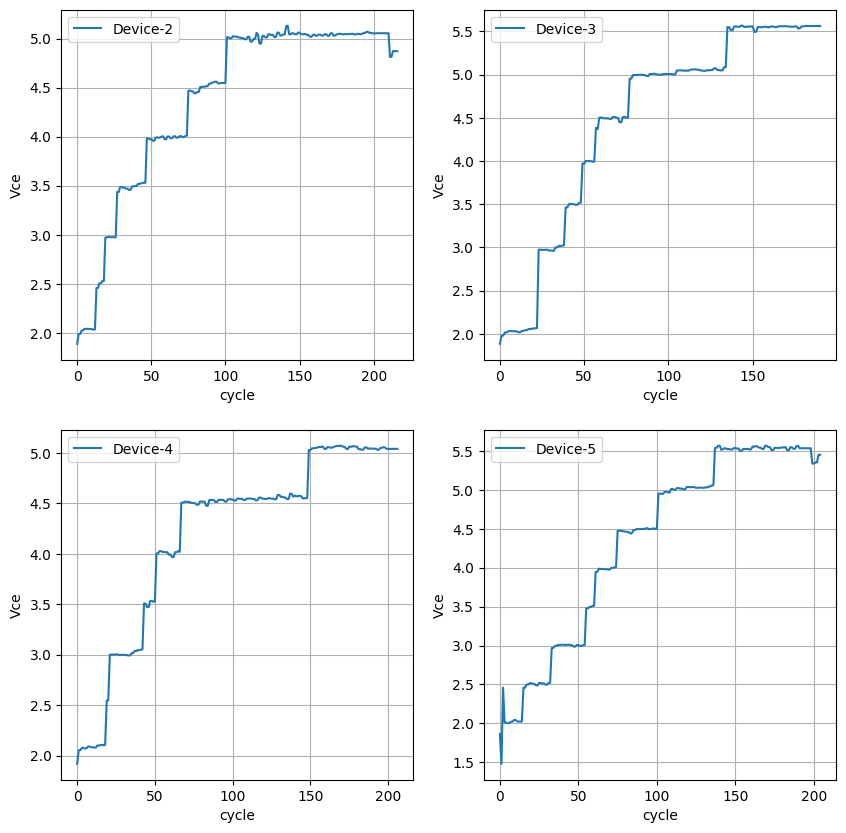

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(df_Device2_processed['collectorEmitterVoltage_avg'], label="Device-2")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df_Device3_processed['collectorEmitterVoltage_avg'], label="Device-3")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df_Device4_processed['collectorEmitterVoltage_avg'], label="Device-4")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df_Device5_processed['collectorEmitterVoltage_avg'], label="Device-5")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.show()

### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_Device2_processed['collectorEmitterVoltage_avg_standardized'] = scaler.fit_transform(df_Device2_processed['collectorEmitterVoltage_avg'].values.reshape(-1, 1))
df_Device3_processed['collectorEmitterVoltage_avg_standardized'] = scaler.fit_transform(df_Device3_processed['collectorEmitterVoltage_avg'].values.reshape(-1, 1))
df_Device4_processed['collectorEmitterVoltage_avg_standardized'] = scaler.fit_transform(df_Device4_processed['collectorEmitterVoltage_avg'].values.reshape(-1, 1))
df_Device5_processed['collectorEmitterVoltage_avg_standardized'] = scaler.fit_transform(df_Device5_processed['collectorEmitterVoltage_avg'].values.reshape(-1, 1))

scaler = StandardScaler()
df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized'] =scaler.fit_transform(df_Device2_processed['collectorEmitterCurrentSignal_avg'].values.reshape(-1, 1))
df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized'] =scaler.fit_transform(df_Device3_processed['collectorEmitterCurrentSignal_avg'].values.reshape(-1, 1))
df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized'] =scaler.fit_transform(df_Device4_processed['collectorEmitterCurrentSignal_avg'].values.reshape(-1, 1))
df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized'] =scaler.fit_transform(df_Device5_processed['collectorEmitterCurrentSignal_avg'].values.reshape(-1, 1))

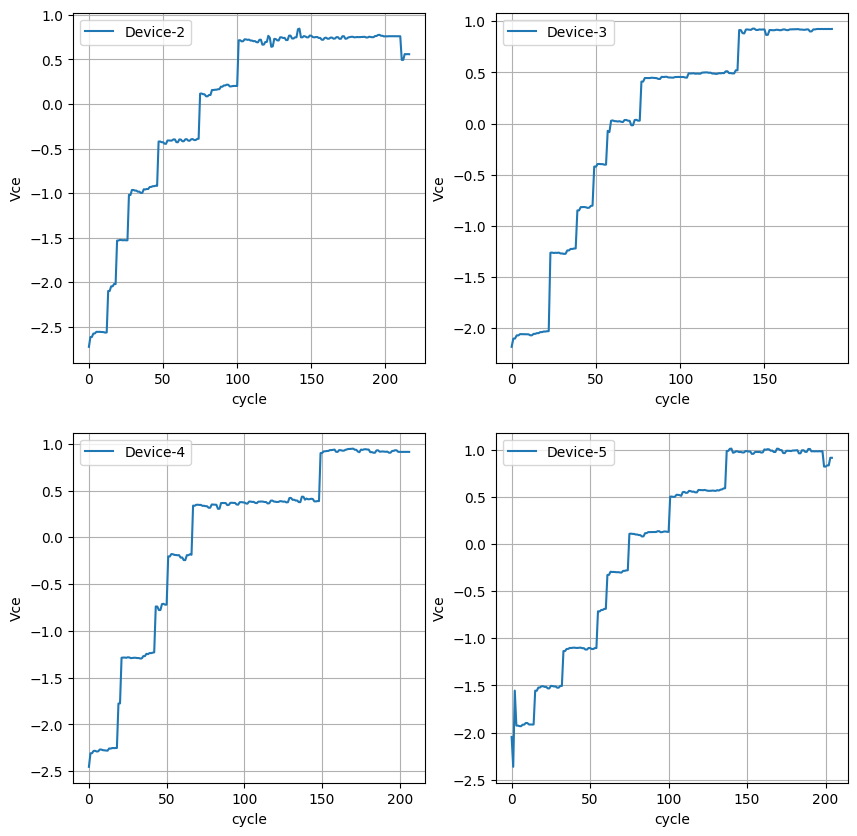

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(df_Device2_processed['collectorEmitterVoltage_avg_standardized'], label="Device-2")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df_Device3_processed['collectorEmitterVoltage_avg_standardized'], label="Device-3")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df_Device4_processed['collectorEmitterVoltage_avg_standardized'], label="Device-4")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df_Device5_processed['collectorEmitterVoltage_avg_standardized'], label="Device-5")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.show()


### Window Smoothing

In [ ]:

df_Device2_processed['collectorEmitterVoltage_avg_standardized_smoothed'] = df_Device2_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=15).mean()
df_Device3_processed['collectorEmitterVoltage_avg_standardized_smoothed'] = df_Device3_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=15).mean()
df_Device4_processed['collectorEmitterVoltage_avg_standardized_smoothed'] = df_Device4_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=15).mean()
df_Device5_processed['collectorEmitterVoltage_avg_standardized_smoothed'] = df_Device5_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=15).mean()

df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized_smoothed'] = df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=15).mean()
df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized_smoothed'] = df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=15).mean()
df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized_smoothed'] = df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=15).mean()
df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized_smoothed'] = df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=15).mean()


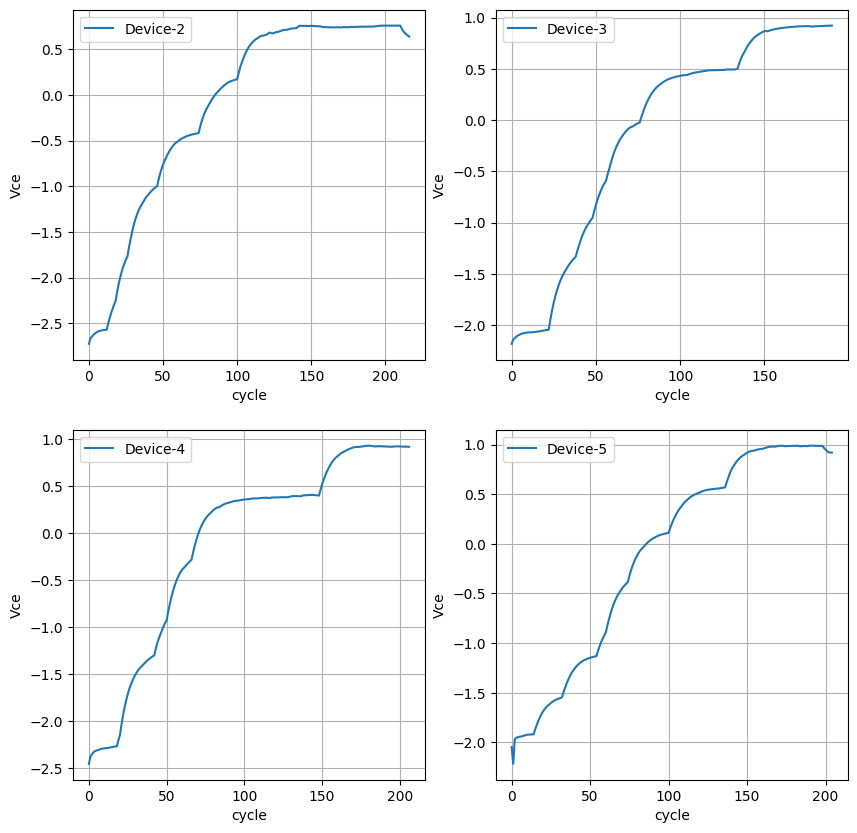

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(df_Device2_processed['collectorEmitterVoltage_avg_standardized_smoothed'], label="Device-2")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df_Device3_processed['collectorEmitterVoltage_avg_standardized_smoothed'], label="Device-3")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df_Device4_processed['collectorEmitterVoltage_avg_standardized_smoothed'], label="Device-4")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df_Device5_processed['collectorEmitterVoltage_avg_standardized_smoothed'], label="Device-5")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.show()

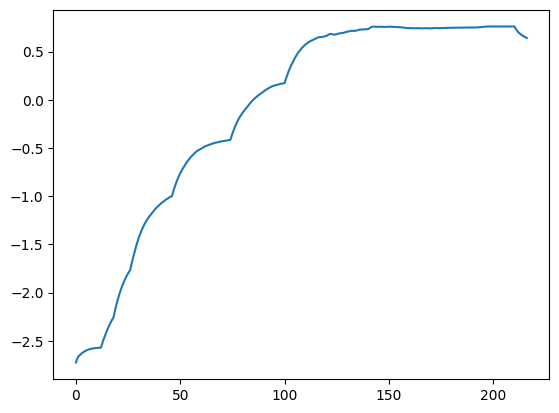

In [ ]:
plt.plot(df_Device2_processed['collectorEmitterVoltage_avg_standardized_smoothed'])

In [ ]:
df_Device5_processed['rul']=1-df_Device5_processed.index/len(df_Device5_processed)
df_Device4_processed['rul']=1-df_Device4_processed.index/len(df_Device4_processed)
df_Device3_processed['rul']=1-df_Device3_processed.index/len(df_Device3_processed)
df_Device2_processed['rul']=1-df_Device2_processed.index/len(df_Device2_processed)

# New Approach

In [ ]:
path = '/content/drive/MyDrive/FeatureTable/'
dataframes = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        name = file[:-4]
        dataframes.append(name)
        globals()[f"{name}"] = pd.read_csv(os.path.join(path, file))
        # dataframes[name] = df

print(dataframes)

['FeatureTable_2', 'FeatureTable_3', 'FeatureTable_4', 'FeatureTable_5']


In [ ]:
FeatureTable_2['rul']=1-FeatureTable_2.index/len(FeatureTable_2)
FeatureTable_3['rul']=1-FeatureTable_3.index/len(FeatureTable_3)
FeatureTable_4['rul']=1-FeatureTable_4.index/len(FeatureTable_4)
FeatureTable_5['rul']=1-FeatureTable_5.index/len(FeatureTable_5)

In [ ]:
FeatureTable_2

,Vce_sigstats/ClearanceFactor,Vce_sigstats/CrestFactor,Vce_sigstats/ImpulseFactor,Vce_sigstats/Kurtosis,Vce_sigstats/Mean,Vce_sigstats/PeakValue,Vce_sigstats/RMS,Vce_sigstats/SINAD,Vce_sigstats/SNR,Vce_sigstats/ShapeFactor,...,Vce_env_sigstats/Mean,Vce_env_sigstats/PeakValue,Vce_env_sigstats/RMS,Vce_env_sigstats/SINAD,Vce_env_sigstats/SNR,Vce_env_sigstats/ShapeFactor,Vce_env_sigstats/Skewness,Vce_env_sigstats/Std,Vce_env_sigstats/THD,rul
0,1.120196,1.082447,1.104635,5.855912,2.287503,2.526855,2.334392,-25.280236,-25.272976,1.020498,...,0.007695,0.503963,0.009359,-24.113302,-24.105067,1.216266,33.766368,0.005327,-2.447091,1.000000
1,1.818732,1.598683,1.742886,1.693157,1.489033,2.595215,1.623345,2.304318,2.857226,1.090201,...,0.007549,1.167641,0.011981,-24.312518,-24.300198,1.587089,81.493684,0.009303,-0.485284,0.995413
2,1.319518,1.238545,1.289522,1.141848,1.987365,2.562750,2.069162,-9.557899,-9.508031,1.041159,...,0.011474,1.065723,0.016007,-21.971437,-21.947879,1.395061,34.965190,0.011161,-0.404477,0.990826
3,1.334681,1.253044,1.304447,1.141984,1.988582,2.594000,2.070158,-8.900090,-8.874810,1.041023,...,0.011377,1.074307,0.015999,-23.928347,-23.906931,1.406193,35.582644,0.011248,1.231568,0.986239
4,1.322207,1.255051,1.297717,1.141994,2.022976,2.625250,2.091748,-5.200406,-5.179661,1.033995,...,0.011035,1.047612,0.015794,-19.268715,-19.256533,1.431312,32.487254,0.011300,-5.134048,0.981651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1.195574,1.174451,1.188242,1.165211,4.812782,5.718750,4.869296,-9.918144,-9.771498,1.011742,...,0.014036,2.577337,0.024181,-22.333451,-22.326481,1.722846,91.956052,0.019691,-2.985017,0.022936
214,1.166687,1.150408,1.161072,1.167460,4.871573,5.656250,4.916736,-4.788443,-4.726638,1.009271,...,0.015201,2.578394,0.025170,-24.358500,-24.348210,1.655811,86.359907,0.020062,-1.366619,0.018349
215,1.160576,1.144230,1.154938,1.167373,4.870393,5.625000,4.915968,-6.009193,-5.893419,1.009358,...,0.014928,2.565290,0.024973,-21.546883,-21.522057,1.672848,86.535605,0.020020,-0.104816,0.013761
216,1.166687,1.150408,1.161072,1.167460,4.871573,5.656250,4.916736,-4.788443,-4.726638,1.009271,...,0.015201,2.578394,0.025170,-24.358500,-24.348210,1.655811,86.359907,0.020062,-1.366619,0.009174


In [ ]:
df_Device5_processed.shape

(205, 7)

In [ ]:
df1=FeatureTable_5[:204]
df1.shape

(204, 27)

In [ ]:
df1.drop(['rul'],axis=1,inplace=True)
df1.shape

<ipython-input-56-60f9de44190f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['rul'],axis=1,inplace=True)


(204, 26)

In [ ]:
df2=df_Device5_processed[['rul', 'collectorEmitterVoltage_avg_standardized_smoothed', 'collectorEmitterCurrentSignal_avg_standardized_smoothed']]
df2=df2[1:]
df2.shape

(204, 3)

In [ ]:
df2=df2.reset_index(drop=True)
df2.shape

(204, 3)

In [ ]:
df3=pd.concat([df1,df2],axis=1)
df3.shape

(204, 29)

In [ ]:
X=df3.drop(['rul'],axis=1)
y=df3['rul']
X.shape, y.shape

((204, 28), (204,))

In [ ]:
X.isnull().sum()

,0
Vce_sigstats/ClearanceFactor,0
Vce_sigstats/CrestFactor,0
Vce_sigstats/ImpulseFactor,0
Vce_sigstats/Kurtosis,0
Vce_sigstats/Mean,0
Vce_sigstats/PeakValue,0
Vce_sigstats/RMS,0
Vce_sigstats/SINAD,0
Vce_sigstats/SNR,0
Vce_sigstats/ShapeFactor,0


In [ ]:
y.isnull().sum()

np.int64(0)

In [ ]:
# cols=['Vce_sigstats/ClearanceFactor', 'Vce_sigstats/PeakValue', 'Vce_sigstats/ShapeFactor',
#       'Vce_sigstats/Std', 'collectorEmitterVoltage_avg_standardized_smoothed'
cols=['Vce_sigstats/ClearanceFactor', 'Vce_sigstats/PeakValue',
        'Vce_sigstats/SINAD',
        'Vce_sigstats/SNR', 'Vce_sigstats/ShapeFactor',
        'Vce_sigstats/Std', 'collectorEmitterVoltage_avg_standardized_smoothed']

# cols=['collectorEmitterVoltage_avg_standardized_smoothed']

In [ ]:
X1=X[cols]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X1=scaler.fit_transform(X1)

# RNN/LSTM Based Models

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error

In [ ]:
def dataset_insample_tensorflow(X,y,seq_length):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for i in range(X.shape[0] - seq_length):
        if (i + 1) % 5 == 0:
            X_test.append(X[i:i + seq_length])
            y_test.append(y[i])
        else:
            X_train.append(X[i:i + seq_length])
            y_train.append(y[i])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    return X_train,y_train, X_test,y_test

In [ ]:
def custom_loss_kera(alpha=0.1, beta=1, gamma=0.1):
  def loss(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred))  # MSE part
    pinn_term1 = K.mean(K.relu(y_pred[1:] - y_pred[:-1]))  # Consider normalization later
    pinn_term2 = K.mean(K.square(K.relu(-y_pred))) + K.mean(K.square(K.relu(y_pred - 1)))
    return (1 - alpha) * mse + alpha* gamma * pinn_term1 + beta * pinn_term2
  return loss

In [ ]:
class RNNEstimator(BaseEstimator, RegressorMixin):
    def __init__(self, input_shape, lstm_units=80):
        self.input_shape = input_shape
        self.lstm_units = lstm_units
        self.model = None

    def fit(self, X, y,epoch=100,batch_size=10,loss='mean_squared_error'):
        self.model = Sequential()
        self.model.add(SimpleRNN(self.lstm_units, return_sequences=False, input_shape=self.input_shape))
        self.model.add(Dense(10))
        self.model.add(Dense(1))
        self.model.compile(loss=loss, optimizer='adam')
        self.model.fit(X, y, epochs=epoch,batch_size=batch_size,verbose=2)
    def predict(self, X):
        return self.model.predict(X)

In [ ]:
class LSTMEstimator(BaseEstimator, RegressorMixin):
    def __init__(self, input_shape, lstm_units=80):
        self.input_shape = input_shape
        self.lstm_units = lstm_units
        self.model = None

    def fit(self, X, y,epoch=100,batch_size=10,loss='mean_squared_error'):
        self.model = Sequential()
        self.model.add(LSTM(self.lstm_units, return_sequences=False, input_shape=self.input_shape))
        self.model.add(Dense(10))
        self.model.add(Dense(1))
        self.model.compile(loss=loss, optimizer='adam')
        self.model.fit(X, y, epochs=epoch,batch_size=batch_size,verbose=2)
    def predict(self, X):
        return self.model.predict(X)

    def save(self, path):
        if self.model is not None:
            self.model.save(path)
        else:
            raise ValueError("The model has not been trained yet.")

    @classmethod
    def load(cls, path, input_shape, lstm_units=80, custom_objects=None):
        """Load the model from the specified path."""
        instance = cls(input_shape, lstm_units)
        instance.model = tf.keras.models.load_model(path, custom_objects=custom_objects)
        return instance

In [ ]:
def model_training_LSTM(X_train,y_train,input_shape=(10,1),epoch=200,batch_size=32,para=(0.1,1,0.1),model='PI-LSTM'):
  alpha,beta,gamma=para
  lstm_estimator = LSTMEstimator(input_shape=input_shape)
  if model=='PI-LSTM':
    print('PI-LSTM model is running....')
    history=lstm_estimator.fit(X_train, y_train,epoch,batch_size,loss=custom_loss_kera(alpha=alpha, beta=beta, gamma=gamma))
  else:
    history=lstm_estimator.fit(X_train, y_train,epoch,batch_size,loss='mean_squared_error')
    print('LSTM model is running....')
  lstm_estimator.save('/lstm_estimator.h5')
  lstm_estimator.model.summary()
  return lstm_estimator

In [ ]:
def model_training_RNN(X_train,y_train,input_shape=(10,1),epoch=200,batch_size=32,para=(0.1,1,0.1),model='PI-RNN'):
  alpha,beta,gamma=para
  # callbacks = myCallback()
  rnn_estimator = RNNEstimator(input_shape=input_shape)
  if model=='PI-RNN':
    print('PI-RNN model is running....')
    history=rnn_estimator.fit(X_train, y_train,epoch,batch_size,loss=custom_loss_kera(alpha=alpha, beta=beta, gamma=gamma))
  else:
    history=rnn_estimator.fit(X_train, y_train,epoch,batch_size,loss='mean_squared_error')
    print('RNN model is running....')
  rnn_estimator.model.summary()
  return rnn_estimator

In [ ]:
def evaluation_training_testing(lstm_estimator,X_train,y_train,X_test,y_test):
  print('Test data...')
  y_pred_test = lstm_estimator.predict(X_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  print(f'Mean Squared Error (MSE): {mse_test}')
  r2_test = r2_score(y_test, y_pred_test)
  print(f'R-squared (R2) Score: {r2_test}\n')
  return y_pred_test,mse_test,r2_test

def plot_training_testing(y_test, y_pred_test,alpha=0):
  plt.figure(figsize=(12, 8))
  plt.plot(y_test, label='Reference', linewidth=5)
  plt.plot(y_pred_test, label='PI-RNN', linewidth=5, linestyle="dashed", color="red")

  plt.xlabel('Cycle', size=30)
  plt.ylabel('RUL', size=30)
  plt.rc('font',size=30)
  plt.title('PI-RNN', size=30)
  plt.grid()
  plt.legend()
  plt.show()

def plot_training_testing1(y_test, y_pred_test,alpha=0):
  plt.figure(figsize=(12, 8))
  plt.plot(y_test, label='Reference', linewidth=5)
  plt.plot(y_pred_test, label='PI-LSTM', linewidth=5, linestyle="dashed", color="red")

  plt.xlabel('Cycle', size=30)
  plt.ylabel('RUL', size=30)
  plt.rc('font',size=30)
  plt.title('PI-LSTM', size=30)
  plt.grid()
  plt.legend()
  plt.show()

def plot_training_testing2(y_test, y_pred_test,alpha=0):
  plt.figure(figsize=(12, 8))
  plt.plot(y_test, label='Reference', linewidth=5)
  plt.plot(y_pred_test, label='PI-LSTM', linewidth=5, linestyle="dotted", color="red")

  plt.xlabel('Cycle', size=30)
  plt.ylabel('RUL', size=30)
  plt.rc('font',size=30)
  plt.title('PI-LSTM', size=30)
  plt.grid()
  plt.legend()
  plt.show()


In [ ]:
def plot_training_testing3(y_test, y_pred_test,alpha=0):
  plt.figure(figsize=(12, 8))
  plt.plot(y_test, label='Reference', linewidth=5)
  plt.plot(y_pred_test, label='LSTM', linewidth=5, linestyle="dashed", color="red")

  plt.xlabel('Cycle', size=30)
  plt.ylabel('RUL', size=30)
  plt.rc('font',size=30)
  plt.title('LSTM', size=30)
  plt.grid()
  plt.legend()
  plt.show()

def plot_training_testing4(y_test, y_pred_test,alpha=0):
  plt.figure(figsize=(12, 8))
  plt.plot(y_test, label='Reference', linewidth=5)
  plt.plot(y_pred_test, label='LSTM', linewidth=5, linestyle="dotted", color="red")

  plt.xlabel('Cycle', size=30)
  plt.ylabel('RUL', size=30)
  plt.rc('font',size=30)
  plt.title('LSTM', size=30)
  plt.grid()
  plt.legend()
  plt.show()

# Training & Evaluation


In [ ]:
X_train, y_train, X_test, y_test = dataset_insample_tensorflow(X1, y, 10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((156, 10, 1), (156,), (38, 10, 1), (38,))

PI-RNN model is running....
Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 2s - 319ms/step - loss: 0.4290
Epoch 2/400
5/5 - 0s - 30ms/step - loss: 0.1177
Epoch 3/400
5/5 - 0s - 15ms/step - loss: 0.0320
Epoch 4/400
5/5 - 0s - 21ms/step - loss: 0.0141
Epoch 5/400
5/5 - 0s - 27ms/step - loss: 0.0178
Epoch 6/400
5/5 - 0s - 21ms/step - loss: 0.0082
Epoch 7/400
5/5 - 0s - 37ms/step - loss: 0.0044
Epoch 8/400
5/5 - 0s - 26ms/step - loss: 0.0056
Epoch 9/400
5/5 - 0s - 26ms/step - loss: 0.0044
Epoch 10/400
5/5 - 0s - 34ms/step - loss: 0.0032
Epoch 11/400
5/5 - 0s - 7ms/step - loss: 0.0035
Epoch 12/400
5/5 - 0s - 12ms/step - loss: 0.0034
Epoch 13/400
5/5 - 0s - 7ms/step - loss: 0.0033
Epoch 14/400
5/5 - 0s - 12ms/step - loss: 0.0032
Epoch 15/400
5/5 - 0s - 12ms/step - loss: 0.0031
Epoch 16/400
5/5 - 0s - 12ms/step - loss: 0.0031
Epoch 17/400
5/5 - 0s - 8ms/step - loss: 0.0033
Epoch 18/400
5/5 - 0s - 12ms/step - loss: 0.0031
Epoch 19/400
5/5 - 0s - 11ms/step - loss: 0.0030
Epoch 20/400
5/5 - 0s - 7ms/step - loss: 0.0030
Epoch 21/400
5/5 - 0s - 12ms/step - loss: 0.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 80)                  │           6,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,145 (86.51 KB)

 Trainable params: 7,381 (28.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,764 (57.68 KB)

Test data...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Mean Squared Error (MSE): 0.00145609330593526
R-squared (R2) Score: 0.979644965927009



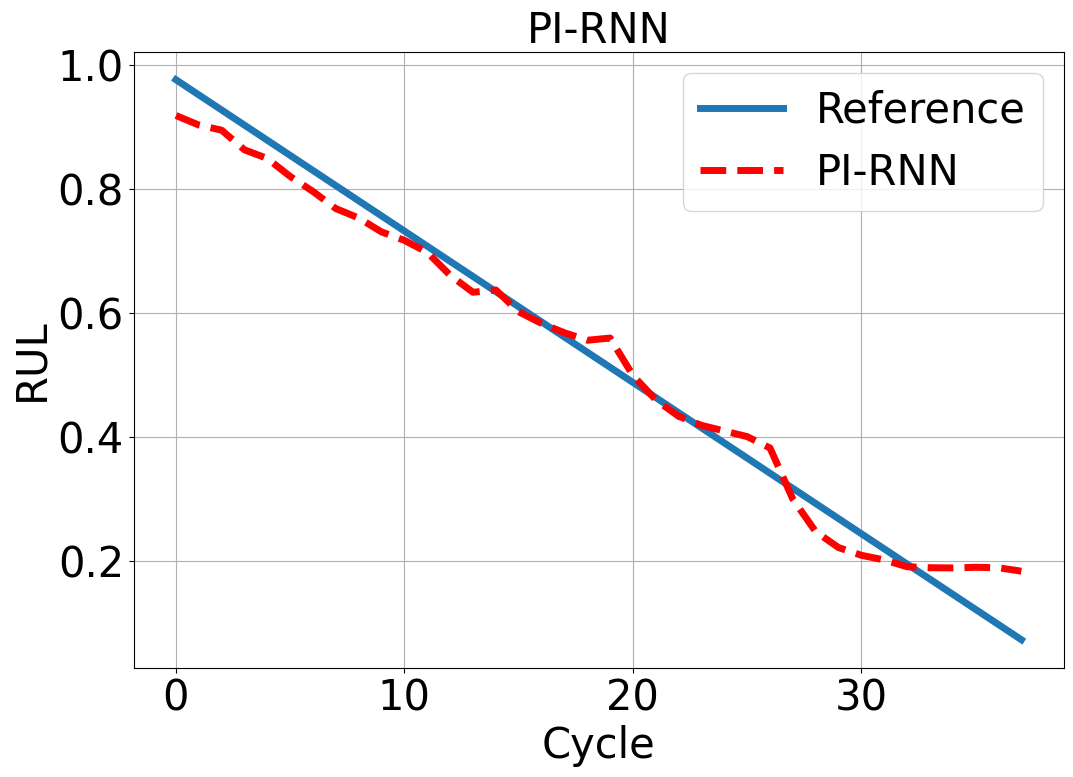

In [ ]:
rnn_estimator_device=model_training_RNN(X_train,y_train,input_shape=(10, X_train.shape[2]),epoch=400,batch_size=32, para=(0.1,1,0.1), model="PI-RNN")

y_pred_test,mse_test,r2_test=evaluation_training_testing(rnn_estimator_device, X_train, y_train, X_test, y_test)

plot_training_testing(y_test, y_pred_test)

In [ ]:
lstm_estimator_device=model_training_LSTM(X_train,y_train,input_shape=(10, X_train.shape[2]),epoch=400,batch_size=32)

y_pred_test,mse_test,r2_test=evaluation_training_testing(lstm_estimator_device, X_train, y_train, X_test, y_test)

# plot_training_testing3(y_test, y_pred_test)

PI-LSTM model is running....
Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 4s - 751ms/step - loss: 0.1872
Epoch 2/400
5/5 - 0s - 24ms/step - loss: 0.0420
Epoch 3/400
5/5 - 0s - 30ms/step - loss: 0.0267
Epoch 4/400
5/5 - 0s - 26ms/step - loss: 0.0238
Epoch 5/400
5/5 - 0s - 53ms/step - loss: 0.0133
Epoch 6/400
5/5 - 0s - 16ms/step - loss: 0.0131
Epoch 7/400
5/5 - 0s - 16ms/step - loss: 0.0121
Epoch 8/400
5/5 - 0s - 16ms/step - loss: 0.0097
Epoch 9/400
5/5 - 0s - 15ms/step - loss: 0.0087
Epoch 10/400
5/5 - 0s - 16ms/step - loss: 0.0081
Epoch 11/400
5/5 - 0s - 31ms/step - loss: 0.0071
Epoch 12/400
5/5 - 0s - 27ms/step - loss: 0.0067
Epoch 13/400
5/5 - 0s - 21ms/step - loss: 0.0060
Epoch 14/400
5/5 - 0s - 25ms/step - loss: 0.0057
Epoch 15/400
5/5 - 0s - 24ms/step - loss: 0.0055
Epoch 16/400
5/5 - 0s - 27ms/step - loss: 0.0049
Epoch 17/400
5/5 - 0s - 18ms/step - loss: 0.0046
Epoch 18/400
5/5 - 0s - 18ms/step - loss: 0.0043
Epoch 19/400
5/5 - 0s - 17ms/step - loss: 0.0040
Epoch 20/400
5/5 - 0s - 28ms/step - loss: 0.0037
Epoch 21/400
5/5 - 0s - 28ms/step - loss

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                       │ (None, 80)                  │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,945 (339.63 KB)

 Trainable params: 28,981 (113.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 57,964 (226.43 KB)

Test data...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Mean Squared Error (MSE): 0.0003122879519142074
R-squared (R2) Score: 0.9956344611462139



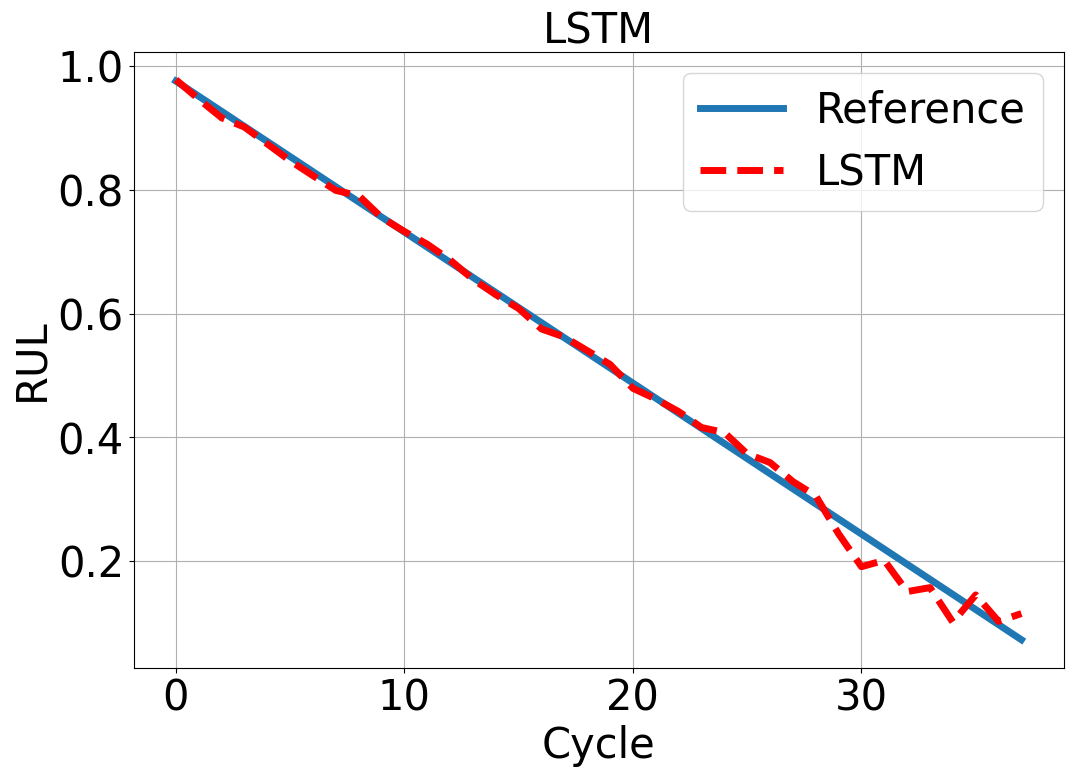

In [ ]:
plot_training_testing3(y_test, y_pred_test)

In [ ]:
lstm_estimator_device=model_training_LSTM(X_train,y_train,input_shape=(10, X_train.shape[2]),epoch=400,batch_size=32,para=(0.1,1,0.1), model="'PI-LSTM'")

y_pred_test,mse_test,r2_test=evaluation_training_testing(lstm_estimator_device, X_train, y_train, X_test, y_test)

# plot_training_testing(y_test, y_pred_test)

Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 5s - 1s/step - loss: 0.1440
Epoch 2/400
5/5 - 0s - 27ms/step - loss: 0.0290
Epoch 3/400
5/5 - 0s - 18ms/step - loss: 0.0307
Epoch 4/400
5/5 - 0s - 18ms/step - loss: 0.0150
Epoch 5/400
5/5 - 0s - 32ms/step - loss: 0.0173
Epoch 6/400
5/5 - 0s - 28ms/step - loss: 0.0110
Epoch 7/400
5/5 - 0s - 26ms/step - loss: 0.0076
Epoch 8/400
5/5 - 0s - 28ms/step - loss: 0.0079
Epoch 9/400
5/5 - 0s - 22ms/step - loss: 0.0060
Epoch 10/400
5/5 - 0s - 30ms/step - loss: 0.0057
Epoch 11/400
5/5 - 0s - 28ms/step - loss: 0.0050
Epoch 12/400
5/5 - 0s - 27ms/step - loss: 0.0043
Epoch 13/400
5/5 - 0s - 29ms/step - loss: 0.0037
Epoch 14/400
5/5 - 0s - 31ms/step - loss: 0.0034
Epoch 15/400
5/5 - 0s - 18ms/step - loss: 0.0031
Epoch 16/400
5/5 - 0s - 30ms/step - loss: 0.0027
Epoch 17/400
5/5 - 0s - 20ms/step - loss: 0.0024
Epoch 18/400
5/5 - 0s - 28ms/step - loss: 0.0023
Epoch 19/400
5/5 - 0s - 29ms/step - loss: 0.0022
Epoch 20/400
5/5 - 0s - 26ms/step - loss: 0.0025
Epoch 21/400
5/5 - 0s - 30ms/step - loss: 0

LSTM model is running....


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, 80)                  │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,945 (339.63 KB)

 Trainable params: 28,981 (113.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 57,964 (226.43 KB)

Test data...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Mean Squared Error (MSE): 0.0010333341584235485
R-squared (R2) Score: 0.985554804820707



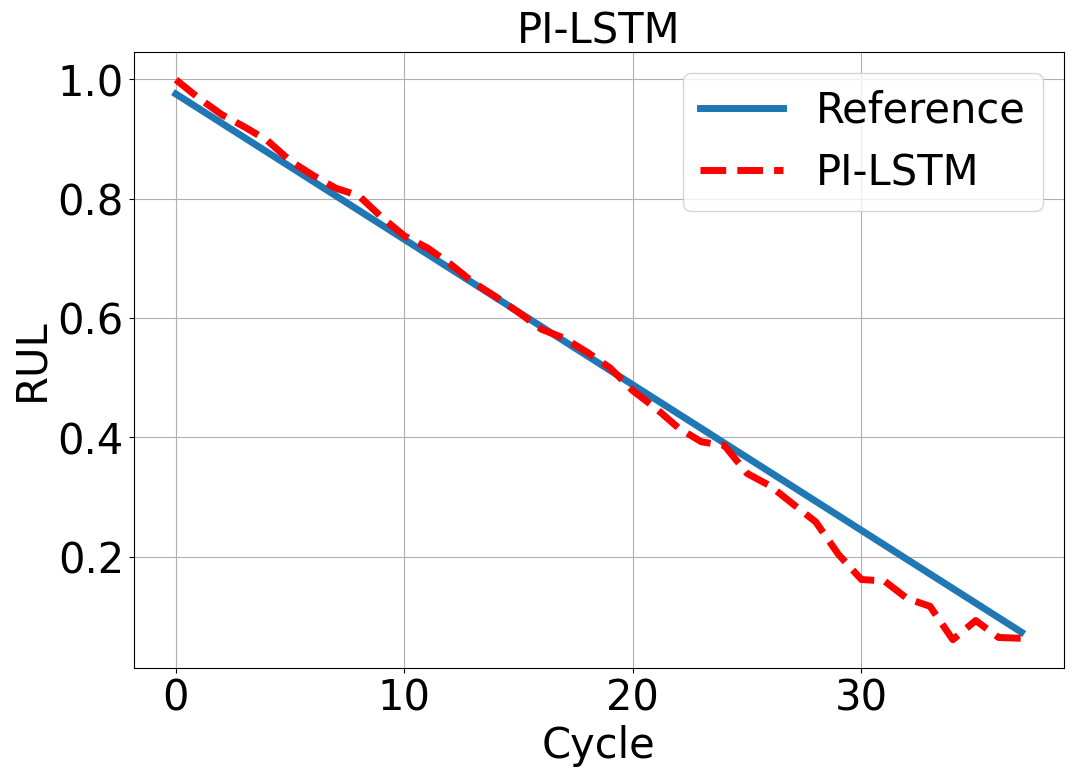

In [ ]:
plot_training_testing1(y_test, y_pred_test)

# Model Deploying

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class CustomLoss(nn.Module):
    def __init__(self, alpha=0.1, beta=1, gamma=0.1):
        super(CustomLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def forward(self, y_true, y_pred):
        mse = torch.mean((y_true - y_pred) ** 2)  # MSE part
        pinn_term1 = torch.mean(torch.relu(y_pred[1:] - y_pred[:-1]))  # Consider normalization later
        pinn_term2 = torch.mean(torch.relu(-y_pred) ** 2) + torch.mean(torch.relu(y_pred - 1) ** 2)
        return (1 - self.alpha) * mse + self.alpha * self.gamma * pinn_term1 + self.beta * pinn_term2

In [ ]:
import mlflow
import mlflow.pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import mean_squared_error
from mlflow.models.signature import infer_signature

def dataset_insample_tensorflow(X, y, seq_length):
    X_train, X_test, y_train, y_test = [], [], [], []
    for i in range(X.shape[0] - seq_length):
        if (i + 1) % 5 == 0:
            X_test.append(X[i:i + seq_length])
            y_test.append(y[i])
        else:
            X_train.append(X[i:i + seq_length])
            y_train.append(y[i])
    return (
        np.array(X_train), np.array(y_train),
        np.array(X_test), np.array(y_test)
    )

# Enable automatic logging for PyTorch
mlflow.pytorch.autolog()

# Prepare the dataset
X_train, y_train, X_test, y_test = dataset_insample_tensorflow(X1, y, 10)
X_train, y_train, X_test, y_test = map(
    lambda x: torch.tensor(x, dtype=torch.float32),
    (X_train, y_train, X_test, y_test)
)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h, _ = self.lstm(x)
        out = self.fc(h[:, -1, :])
        return out



model = LSTMModel(input_size=X_train.shape[2], hidden_size=50, output_size=1)
criterion = CustomLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(y_batch, outputs)
            loss.backward()
            optimizer.step()
    return model

with mlflow.start_run() as run:
    # Train the model
    model = train_model(model, train_loader, criterion, optimizer, epochs=50)

    # Evaluate the model
    model.eval()  # Switch to evaluation mode
    y_pred_test = model(X_test).detach().numpy()
    mse_test = mean_squared_error(y_test.numpy(), y_pred_test)
    print('Mean Squared Error: ', mse_test)

    # Log the model
    input_example = X_test[0].unsqueeze(0).numpy()
    signature = infer_signature(X_test.numpy(), y_pred_test)
    mlflow.pytorch.log_model(
        model,
        "LSTM_model_09Jan",
        input_example=input_example,
        signature=signature
    )

    # Get the run ID
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")


In [ ]:
# Define the model URI
model_uri = f"runs:/{run_id}/LSTM_model_09Jan"

# Register the model
model_name = "my_LSTM_model_09Jan"
mlflow.register_model(model_uri, model_name)

# Inferencing

In [ ]:
import os
import requests
import numpy as np
import pandas as pd
import json

In [ ]:
def create_tf_serving_json(data):
    return {'inputs': {name: data[name].tolist() for name in data.keys()} if isinstance(data, dict) else data.tolist()}

def score_model(dataset):
    url = 'https://adb-3074720837310273.13.azuredatabricks.net/serving-endpoints/my_lstm_pytorch/invocations'
    headers = {'Authorization': f'Bearer {os.environ.get("DATABRICKS_TOKEN")}', 'Content-Type': 'application/json'}
    ds_dict = {'dataframe_split': dataset.to_dict(orient='split')} if isinstance(dataset, pd.DataFrame) else create_tf_serving_json(dataset)
    data_json = json.dumps(ds_dict, allow_nan=True)
    response = requests.request(method='POST', headers=headers, url=url, data=data_json)
    if response.status_code != 200:
        raise Exception(f'Request failed with status {response.status_code}, {response.text}')
    return response.json()


In [ ]:
X_test=torch.Tensor([[[ 2.5003, -2.5149,  0.0905,  0.0798,  2.6284,  0.6151, -2.3702],
         [ 2.2676, -2.5496, -0.4776, -0.4849,  2.6163,  0.6069, -2.3618],
         [ 1.8803, -2.5844, -0.6110, -0.6159,  2.3257,  0.3109, -2.3556],
         [ 2.3059, -2.5149,  0.0232,  0.0179,  2.3240,  0.3111, -2.3512],
         [ 2.0933, -2.5496, -0.2237, -0.2328,  2.3206,  0.3053, -2.3481],
         [ 2.1059, -2.5496, -0.6389, -0.6519,  2.3327,  0.3155, -2.3456],
         [ 2.1250, -2.5496, -0.3734, -0.3836,  2.3433,  0.3206, -2.3444],
         [ 2.3369, -2.5149, -0.1569, -0.1588,  2.3401,  0.3182, -2.3430],
         [ 1.9583, -2.5844, -0.2165, -0.2153,  2.4260,  0.4060, -2.2771],
         [ 2.1532, -2.5496,  0.4881,  0.4918,  2.4029,  0.3858, -2.2220]],

        [[ 2.1059, -2.5496, -0.6389, -0.6519,  2.3327,  0.3155, -2.3456],
         [ 2.1250, -2.5496, -0.3734, -0.3836,  2.3433,  0.3206, -2.3444],
         [ 2.3369, -2.5149, -0.1569, -0.1588,  2.3401,  0.3182, -2.3430],
         [ 1.9583, -2.5844, -0.2165, -0.2153,  2.4260,  0.4060, -2.2771],
         [ 2.1532, -2.5496,  0.4881,  0.4918,  2.4029,  0.3858, -2.2220],
         [ 1.9019, -1.9938,  4.1209,  4.1141,  2.0709,  1.5947, -2.1689],
         [ 2.0762, -1.9590,  4.1679,  4.1612,  2.0581,  1.5760, -2.1240],
         [ 1.6829, -1.9590,  0.4731,  0.4771,  1.4461,  0.7029, -2.0825],
         [ 1.3315, -2.0285,  0.0891,  0.0838,  1.4529,  0.7165, -2.0474],
         [ 1.4904, -1.9590,  0.2684,  0.2727,  1.1801,  0.2829, -1.9554]]])

In [ ]:
score_model(X_test[:2])